In [1]:
from Lens_Search import QSOFluxProcessor
from astropy.io import fits


import os
import json
import numpy as np
import fitsio


In [2]:
noise = np.load('ivar.npy')
flux = np.load('flux.npy')
target = np.load('target.npy')
Z_QSO = np.load('Z_QSO.npy')

In [3]:
len(target)

2150

In [4]:

results = QSOFluxProcessor.process(flux, 1, target, noise, Z_QSO, skyline_mask = False)

2025-04-07 12:41:23.586592: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-07 12:41:24.380334: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 36812 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:c3:00.0, compute capability: 8.0
2025-04-07 12:41:27.148461: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8302


  88/2150 [>.............................] - ETA: 3s     

2025-04-07 12:41:28.645409: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


68/68 [==============================] - 0s 3ms/step
Error in fit_gaussian: Each lower bound must be strictly less than each upper bound.


In [5]:
np.where(results['SNR'] == np.nan)

(array([], dtype=int64),)

In [6]:
results_filtered = results[(results['Score'] > .7) & 
                           (results['SNR'] > 3) & 
                           (results['z_qso'] < results['Fitted Redshift']) & 
                           ((results['Fitted Redshift'] - results['z_qso'])>0.1)]

In [7]:
np.where(results_filtered['Name'] == 39627726679704831)[0][0]

69

In [23]:
np.where(target == 39627647021484584)

(array([296]),)

In [9]:
results_filtered

,Name,z_qso,Score,Classification,Predicted Redshift,Fitted Redshift,Redshift Error,Best Chi-Squared,Amp1,Err_Amp1,Mean1,Err_Mean1,Sigma1,Err_Sigma1,Mean2,Err_Mean2,Cont,Err_Cont,SNR
13,39627450753222356,0.386886,0.980855,Lens,1.476184,1.450433,0.017687,inf,1.091324,3.462497,9130.311866,65.903394,9132.704144,49.393613,4.732009,15.242887,1.126327,0.033228,13.065966
15,39627461440308174,1.230204,0.854681,Lens,1.451261,1.550557,0.000189,inf,1.347146,0.865584,9503.374888,0.705938,9505.000001,0.528549,0.775127,0.543174,8.268491,0.032705,5.253026
19,39627473083696244,0.816042,0.706957,Lens,1.473784,1.439468,0.000356,inf,5.969010,0.920618,9089.459614,1.327136,9095.079640,0.889967,5.000000,0.819631,4.376356,0.033320,34.377458
23,39627474232937500,0.465468,0.843189,Lens,0.933846,0.968672,0.000510,0.000384,2.567888,0.695014,7335.272477,1.902010,7341.887355,1.231837,5.000000,1.459206,1.929141,0.033393,26.529447
26,39627485381398488,0.718688,0.911767,Lens,0.982986,1.001664,0.000544,inf,1.979882,0.615676,7458.200000,2.025270,7465.304489,1.306930,5.000000,1.686622,5.507985,0.033401,20.718810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,39636443152255817,1.261304,0.843733,Lens,1.486833,1.528873,0.000922,4.081335,0.476156,1.212754,9422.579462,3.436986,9424.200000,2.232844,1.082685,2.994799,3.498306,0.032762,8.481342
2132,39636471988095698,0.805879,0.750145,Lens,1.405834,1.426741,13.544145,inf,0.895537,109.257599,9042.035538,50465.483182,9042.133449,38817.556828,4.196432,511.991916,2.034517,0.033093,11.683705
2139,39636743464422728,0.070340,0.908181,Lens,0.891336,0.859742,0.000379,0.012760,1.580416,0.376630,6929.400000,1.413144,6938.204372,1.051282,4.249296,1.108419,3.247425,0.033329,17.553522
2140,39636757725054461,0.694936,0.899587,Lens,1.224758,1.276490,0.001290,inf,1.018059,0.743179,8482.200000,4.807665,8488.200001,3.120435,4.604150,3.618421,0.610038,0.033311,9.798441


In [10]:
link_to = []

for name in results_filtered['Name']:
    desi_link = f'https://www.legacysurvey.org/viewer-desi/desi-spectrum/dr1/targetid{name}'
    link_to.append(desi_link) 

# Ensure the length of link_to matches the length of filtered_results
results_filtered['Link'] = link_to[:len(results_filtered)]

# Export to CSV with the new column
results_filtered.to_csv('full_filtered_results_phase1.csv', index=False)

/tmp/ipykernel_1790150/621321326.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_filtered['Link'] = link_to[:len(results_filtered)]


In [11]:
filtered_indices = results_filtered.index
filtered_indices

Index([  13,   15,   19,   23,   26,   28,   38,   43,   48,   57,
       ...
       2089, 2101, 2106, 2122, 2126, 2131, 2132, 2139, 2140, 2141],
      dtype='int64', length=288)

In [11]:
## PNG
## LINES FROM SDSS FILE shaded regions
## test on MEyers object 
## generate subplot for all 
## grade on ABC (3 buttons tkinter saving output results)
# Chatgpt?

In [50]:
from Lens_Search import QSOFluxProcessor
wave = np.load('wave.npy', allow_pickle=True)

for i in range(len(filtered_indices)):
    QSOFluxProcessor.plot_gaussian_fit_with_subplots(
        flux[filtered_indices[i]], 
        wave, 
        results_filtered['z_qso'].iloc[i], 
        results_filtered['Fitted Redshift'].iloc[i], 
        results_filtered['Name'].iloc[i], 
        results_filtered['SNR'].iloc[i], 
        save_path=f"Pictures2/{results_filtered['Name'].iloc[i]}.png", 
        plot_qso_lines=True, 
        show_plot=False
    )


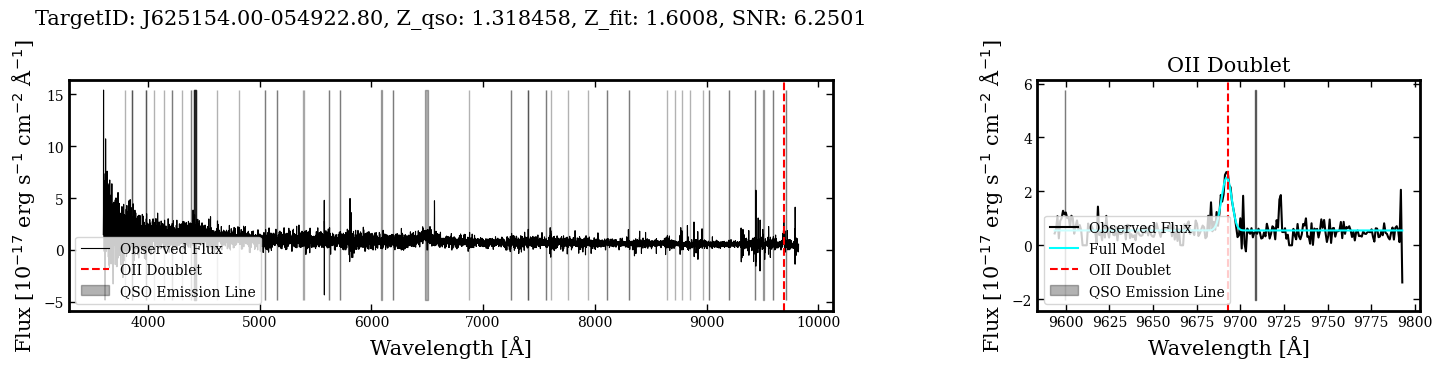

In [25]:
wave = np.load('wave.npy', allow_pickle=True)
ij = 296
QSOFluxProcessor.plot_gaussian_fit_with_subplots(
    flux[ij], 
    wave, 
    Z_QSO[ij], 
    results['Fitted Redshift'][ij], 
    'J625154.00-054922.80', 
    results['SNR'][ij], 
    noise[ij],
    skyline_mask = False,
    save_path=None, 
    plot_qso_lines=True, 
    show_plot=True
)


In [ ]:
link_to = []

for name in results['Name']:
    desi_link = f'https://www.legacysurvey.org/viewer-desi/desi-spectrum/dr1/targetid{name}'
    link_to.append(desi_link) 

# Ensure the length of link_to matches the length of filtered_results
results['Link'] = link_to[:len(results)]

# Export to CSV with the new column
results.to_csv('full_filtered_results.csv', index=False)
